## Imports

In [1]:
import re

from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from cltk.corpus.latin import latinlibrary
from cltk.tokenize.sentence import TokenizeSentence
from cltk.tokenize.word import WordTokenizer

## CLTK Tools

In [2]:
word_tokenizer = WordTokenizer('latin')
sent_tokenizer = TokenizeSentence('latin')

## Process Files

In [3]:
files = latinlibrary.fileids()
cicero_files = [file for file in files if 'cicero/' in file]
cicero_files = [file for file in cicero_files if 'consulatu.txt' not in file]
cicero_files = [file for file in cicero_files if 'divinatione.txt' not in file]
cicero_files = [file for file in cicero_files if 'nd.txt' not in file]
cicero_raw = latinlibrary.raw(cicero_files)

## Function for preprocessing texts

In [4]:
# Preprocess texts
def preprocess(text):    
    
    text = text.lower()
    
    text= re.sub(r'&lt;','<',text)
    text= re.sub(r'&gt;','>',text)    
        
    punctuation ="\"#$%&\'()*+,-/:;<=>@[\]^_`{|}~"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    
    translator = str.maketrans({key: " " for key in '0123456789'})
    text = text.translate(translator)
    
    #from cltk.stem.latin.j_v import JVReplacer
    #replacer = JVReplacer()
    #text = replacer.replace(text)

    remove_list = [r'\bthe latin library\b', r'\bthe classics page\b', r'\bcicero\s+?$'] 
    for pattern in remove_list:
        text = re.sub(pattern, '', text)
    
    return text

## Process Texts

In [5]:
# Assemble a list of all 140 of Cicero's texts
cicero_texts = [latinlibrary.raw(file) for file in cicero_files]
cicero_texts = [preprocess(text) for text in cicero_texts]

# Assemble a list of all 140 of Cicero's titles
cicero_titles = [text.split('\n')[0].strip() for text in cicero_texts]
cicero_titles = [title.split('cicero ',1)[-1].lower().strip() for title in cicero_titles]
cicero_titles = [title[:-1] if title.endswith('.') else title for title in cicero_titles]

In [6]:
def sent_count(text):
    sents = sent_tokenizer.tokenize(text)
    return(len(sents))

def word_count(text):
    words = word_tokenizer.tokenize(text)
    return(len(words))

def char_count(text):
    return len(text)

def syll_count(text):
    return sum(letter in 'aeiouy' for letter in text.lower())

def comp_word_count(text):
    words = text.split()
    comp_words = [word for word in words if syll_count(word) > 3]
    return len(comp_words)

In [7]:
def ari(text):
    c, w, s = char_count(text), word_count(text), sent_count(text)
    score = 4.71 * (c / w) + 0.5 * (w / s) - 21.43
    return score

In [8]:
def dalechall(sentence): 
    pass

In [9]:
def gunningfog(text):
    w, s, cw = word_count(text), sent_count(text), comp_word_count(text)
    score = 0.4 * ((w / s) + (100 * (cw / w)))
    return score

In [10]:
def fleschkincaid(text):
    w, s, sy = word_count(text), sent_count(text), syll_count(text)
    score = (0.39 * (w / s)) + (11.8 * (sy / w)) - 15.59
    return score

In [11]:
def coleman_liau(text):
    c, w, s = char_count(text), word_count(text), sent_count(text)
    cs, ss = (c / w) * 100, (s / w) * 100
    score = (0.0588 * cs) - (0.296 * ss) - 15.8
    return score

In [12]:
# Remove paragraphs less than 5 words long
cicero_paras = []

for text in cicero_texts:
    paras = text.split('\n')
    paras = [" ".join(para.split()) for para in paras]
    
    paras = [para for para in paras if len(para.split()) > 10]
    cicero_paras.append(paras)

In [13]:
aris = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    aris.append((cicero_titles[i],ari(text)))
    
           
aris.sort(key=lambda x: x[1])
pprint(aris[:5])               
pprint(aris[-5:])

[('ad atticum xiii', 8.518604266068955),
 ('ad atticum xii', 8.926175247389793),
 ('ad atticum xv', 9.316047349881217),
 ('ad familiares xiv', 10.036480750927304),
 ('ad atticum xvi', 10.302402547994994)]
[('de oratore iii', 26.79574810281249),
 ('de oratore ii', 27.304608303143894),
 ('post reditum ad quirites', 27.545054641341288),
 ('ad familiares i', 29.054788968318682),
 ('de oratore i', 31.029355209322325)]


In [14]:
cls = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    cls.append((cicero_titles[i],coleman_liau(text)))
    
           
cls.sort(key=lambda x: x[1])
pprint(cls[:5])               
pprint(cls[-5:])

[('ad atticum xiii', 12.441305222640182),
 ('ad atticum xii', 12.765881164477918),
 ('ad atticum xv', 13.234013271073973),
 ('ad familiares xiv', 13.869518455145446),
 ('ad atticum xvi', 14.132220566318928)]
[('in catilinam iv', 21.36215293731539),
 ('post reditum in senatu', 21.681293729372936),
 ('philippic xiv', 22.016496674057645),
 ('post reditum ad quirites', 22.117553384002893),
 ('de re publica iv', 22.825120772946857)]


In [15]:
fks = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    fks.append((cicero_titles[i],fleschkincaid(text)))
    
           
fks.sort(key=lambda x: x[1])
pprint(fks[:5])               
pprint(fks[-5:])

[('ad atticum xiii', 11.397322175228652),
 ('ad atticum xii', 11.936971087306954),
 ('ad atticum xv', 12.34724772671418),
 ('ad familiares xiv', 12.749659923391352),
 ('ad atticum xvi', 13.385129129015834)]
[('de oratore iii', 27.73675182259611),
 ('de oratore ii', 28.119757955764054),
 ('post reditum ad quirites', 28.457473854411962),
 ('ad familiares i', 29.333325668610787),
 ('de oratore i', 31.296026477510555)]


In [16]:
gfs = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    gfs.append((cicero_titles[i],gunningfog(text)))
    
           
gfs.sort(key=lambda x: x[1])
pprint(gfs[:5])               
pprint(gfs[-5:])

[('ad atticum xiii', 9.127952085762171),
 ('ad atticum xii', 9.438213409409675),
 ('ad atticum xv', 9.93396248054395),
 ('ad atticum xi', 10.253558538387052),
 ('ad familiares xiv', 10.57960845798946)]
[('de oratore iii', 23.103391605328667),
 ('de oratore ii', 23.588741384446013),
 ('post reditum ad quirites', 24.284480919008608),
 ('ad familiares i', 25.341200608762485),
 ('de oratore i', 26.611089173241858)]


In [17]:
# Length of work
lengths = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    tokens = word_tokenizer.tokenize(text)
    lengths.append((cicero_titles[i], len(tokens)))

lengths.sort(key=lambda x: x[1])
pprint(lengths[:5])
pprint(lengths[-5:])

[('de re publica iv', 207),
 ('de re publica v', 391),
 ('de lege agraria iii', 1346),
 ('philippic iv', 1462),
 ('de optimo genere oratorum', 1665)]
[('in verrem ii', 20326),
 ('pro a. clventio oratio', 22366),
 ('brutus', 26335),
 ('in verrem ii', 26540),
 ('de oratore ii', 28132)]


In [18]:
# Unique words
uniques = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    tokens = word_tokenizer.tokenize(text)
    uniques.append((cicero_titles[i], len(set(tokens))))

uniques.sort(key=lambda x: x[1])
pprint(uniques[:5])
pprint(uniques[-5:])

[('de re publica iv', 170),
 ('de re publica v', 280),
 ('de lege agraria iii', 714),
 ('philippic iv', 764),
 ('de optimo genere oratorum', 817)]
[('pro a. clventio oratio', 5671),
 ('in verrem ii', 5705),
 ('in verrem ii', 6320),
 ('brutus', 6647),
 ('de oratore ii', 7046)]


In [19]:
# Lexical diversity
lexdivs = []
lexdivs_tokens = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    tokens = word_tokenizer.tokenize(text)
    lexdivs_tokens.append(tokens)
    lexdivs.append((cicero_titles[i], len(set(tokens)) / len(tokens)))

lexdivs.sort(key=lambda x: x[1])
pprint(lexdivs[:5])
pprint(lexdivs[-5:])

[('de inventione ii', 0.22602104803969683),
 ('ad familiares xiii', 0.2324374954967937),
 ('in verrem ii', 0.23813112283345894),
 ('de inventione i', 0.23917388407728182),
 ('de oratore ii', 0.25046210720887246)]
[('philippic ix', 0.5074370709382151),
 ('philippic iv', 0.5225718194254446),
 ('de lege agraria iii', 0.5304606240713224),
 ('de re publica v', 0.7161125319693095),
 ('de re publica iv', 0.821256038647343)]


0.22602104803969683


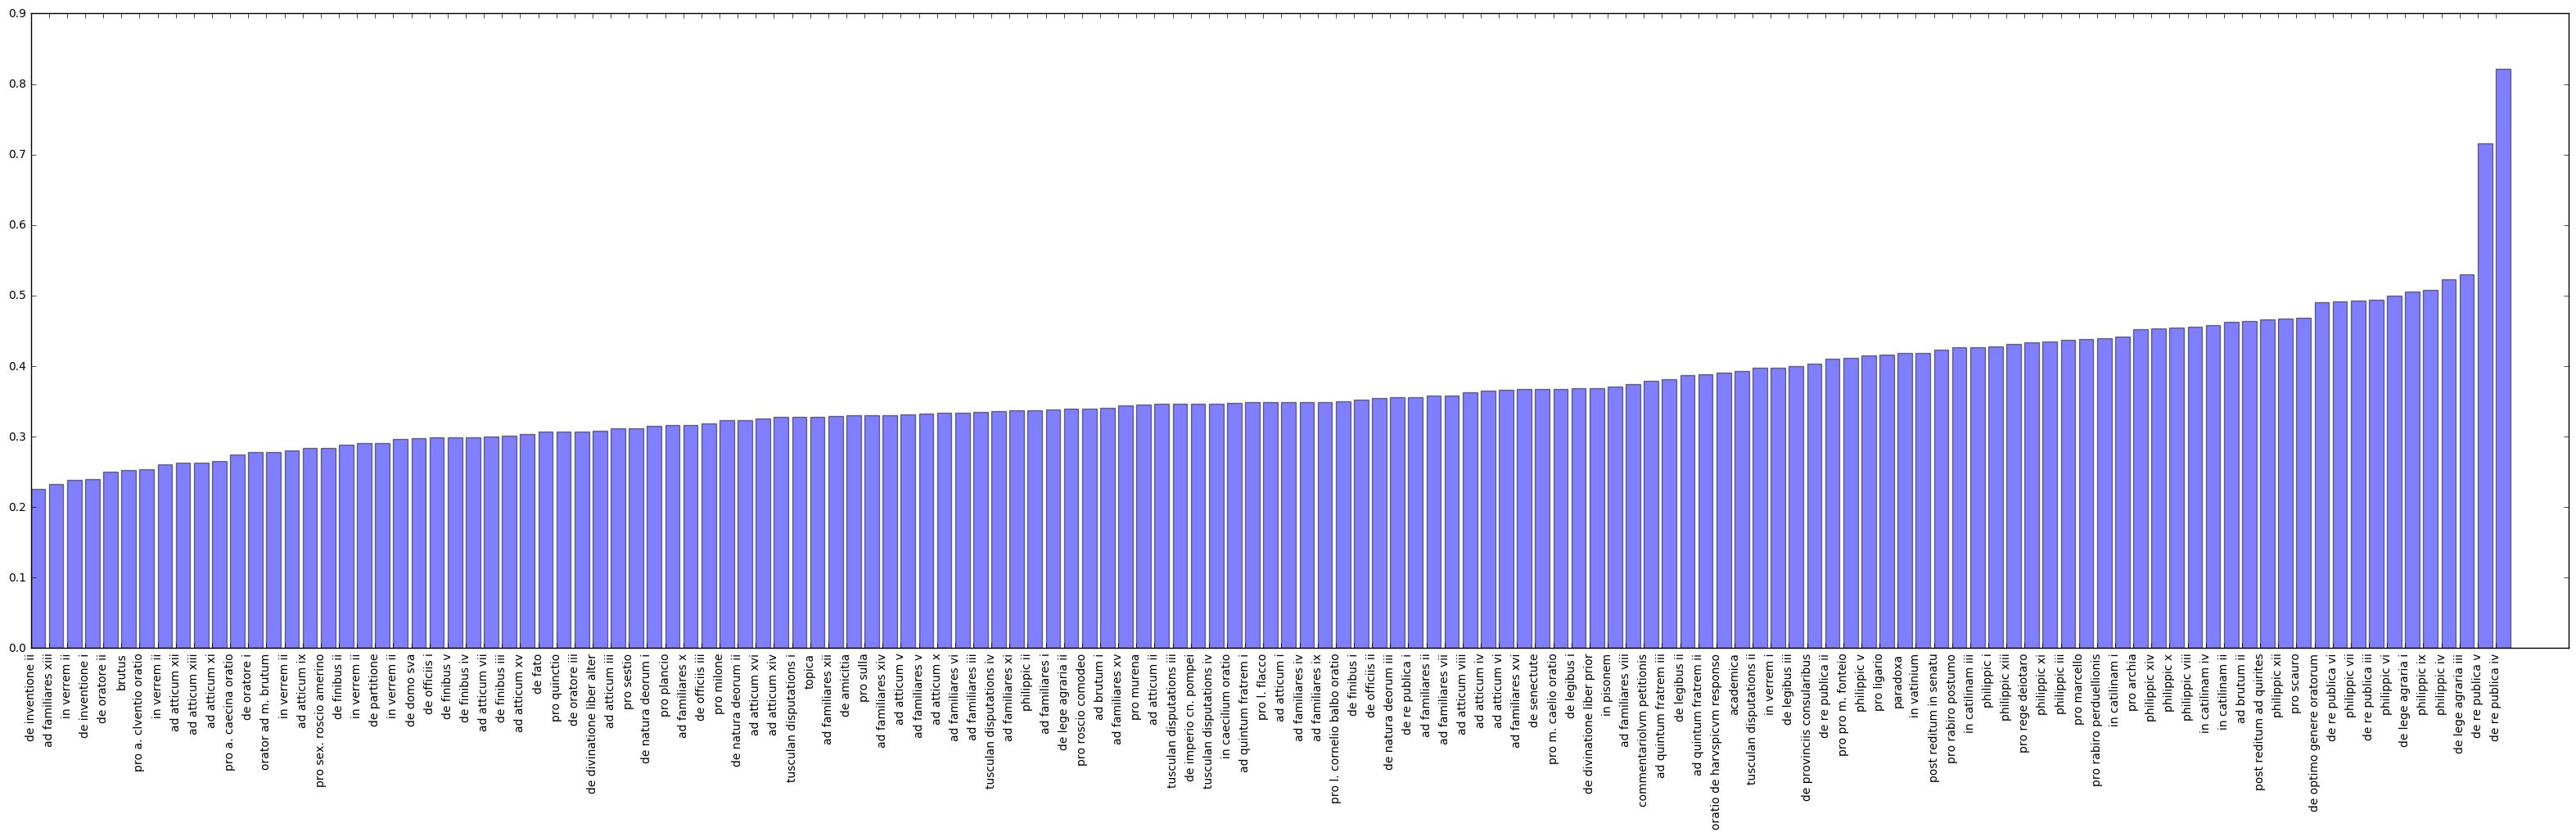

In [20]:
objects = [item[0] for item in lexdivs]
scores = [item[1] for item in lexdivs]

print(min(scores))

y_pos = np.arange(len(objects))
plt.figure(figsize=(40,10))
plt.bar(y_pos, scores, alpha=.5)
plt.xticks(y_pos, objects)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


plt.show()

In [21]:
from collections import Counter
c = list(Counter(lexdivs_tokens[0]).items())
#print(c)

print(sum([item[1] for item in c])/len(c))

2.543640897755611


8.518604266068955


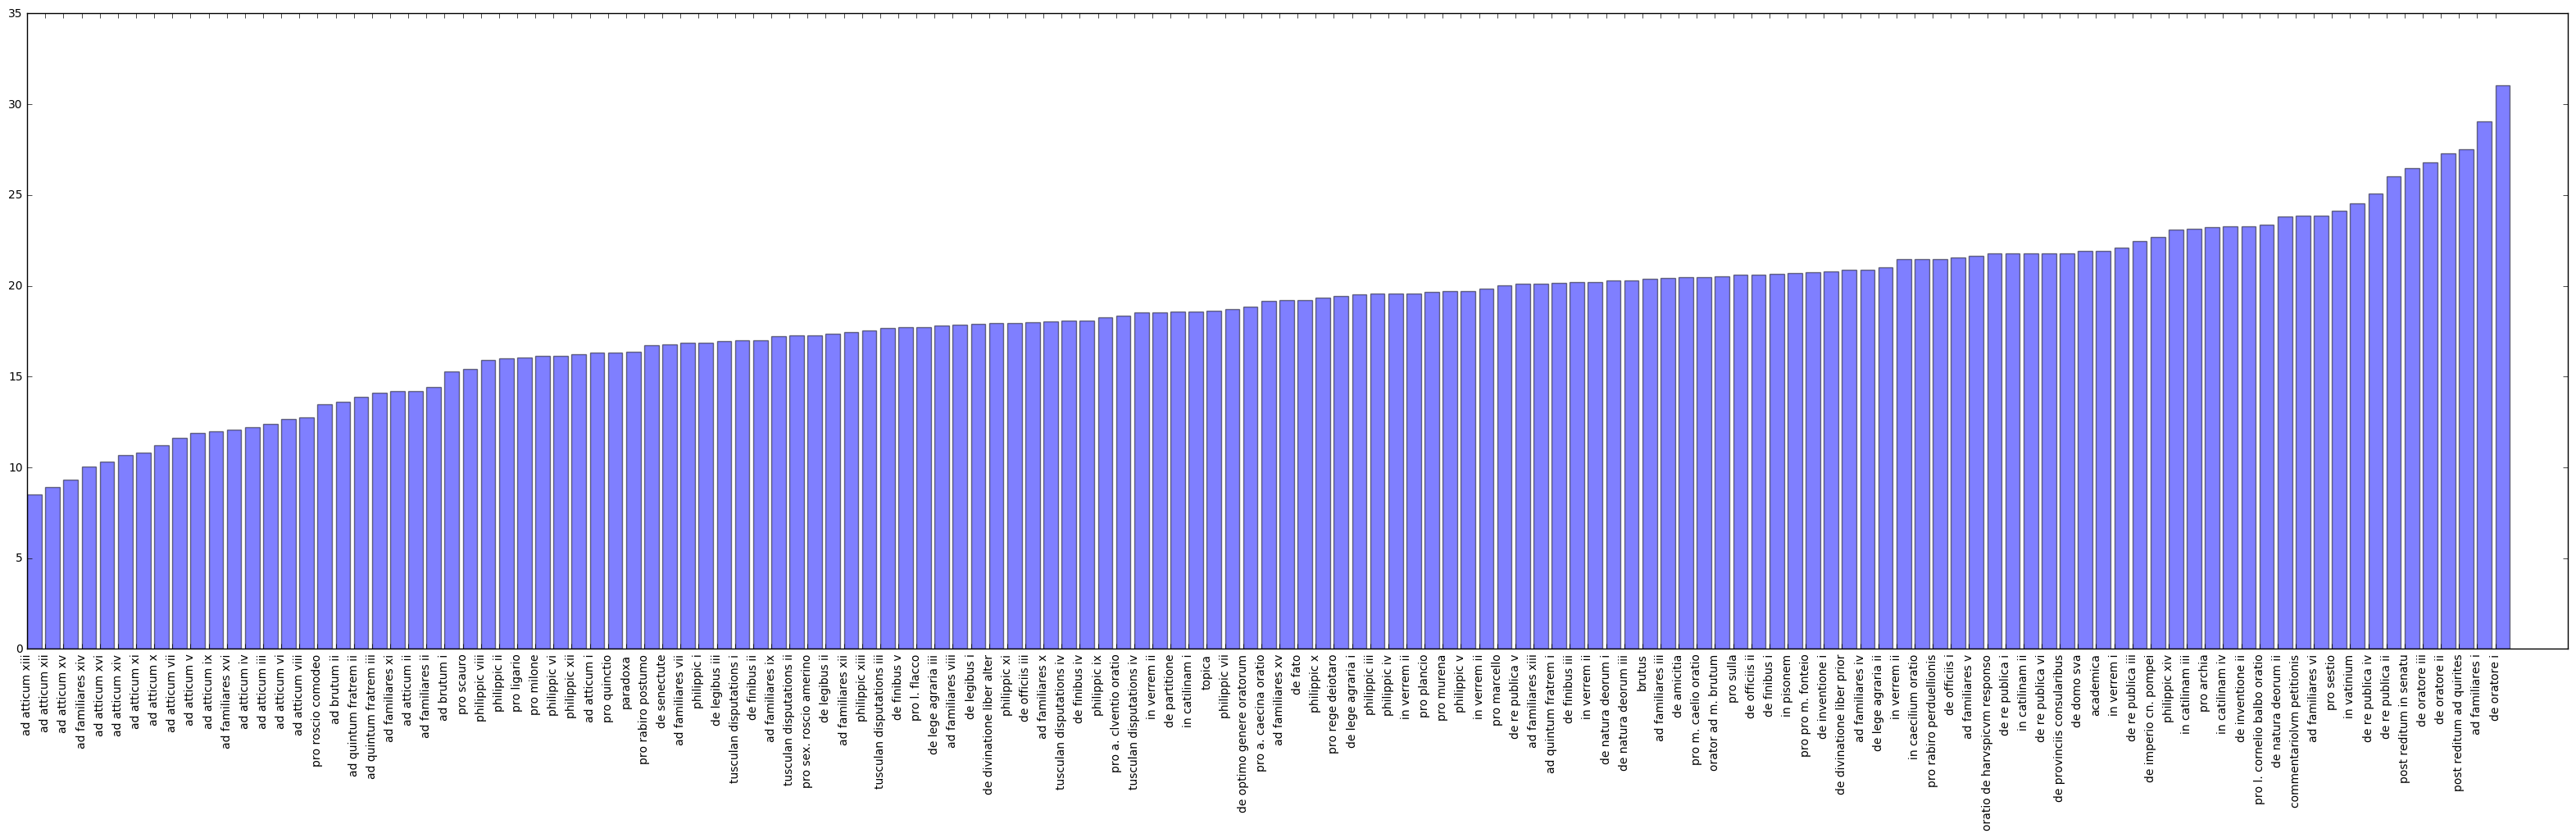

In [22]:
objects = [item[0] for item in aris]
scores = [item[1] for item in aris]


print(min(scores))

y_pos = np.arange(len(objects))
plt.figure(figsize=(40,10))
plt.bar(y_pos, scores, alpha=.5)
plt.xticks(y_pos, objects)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


plt.show()

In [79]:
cicero_para_flat = [item for para in cicero_paras for item in para]
cicero_sents = [sent_tokenizer.tokenize(item) for item in cicero_para_flat]
cicero_sents_flat = [item for sents in cicero_sents for item in sents]

[['in cumano nuper cum mecum atticus noster esset nuntiatum est nobis a m. varrone venisse eum roma pridie vesperi et nisi de via fessus esset continuo ad nos venturum fuisse.', 'quod cum audissemus nullam moram interponendam putavimus quin videremus hominem nobiscum et studiis eisdem et vetustate amicitiae coniunctum itaque confestim ad eum ire perreximus.', 'paulumque cum ab eius villa abessemus ipsum ad nos venientem vidimus atque illum complexi ut mos amicorum est satis enim longo inter vallo ad suam villam reduximus.'], ['hic pauca primo atque ea percunctantibus nobis ecquid forte roma novi.', 'tum atticus omitte ista quae nec percunctari nec audire sine molestia possumus quaeso inquit et quaere potius ecquid ipse novi.', 'silent enim diutius musae varronis quam solebant nec tamen istum cessare sed celare quae scribat existimo.', 'minime vero inquit ille intemperantis enim arbitror esse scribere quod occultari velit sed habeo magnum opus in manihus quae iam pridem ad hunc enim ips

In [82]:
sent_aris = []

for sent in cicero_sents_flat:
    sent_aris.append((sent, ari(sent)))
    
           
sent_aris.sort(key=lambda x: x[1])
pprint(sent_aris[:5])               
pprint(sent_aris[-5:])



[('.', -18.075), ('.', -18.075), ('.', -18.075), ('.', -18.075), ('.', -18.075)]
[('ego cum mihi cum illo magna iam gratia esset quod eius omnes gravissimas '
  'iniurias communis concordiae causa voluntaria quadam oblivione contriveram '
  'repentinam eius defensionem gabinii quem proximis superioribus diebus '
  'acerrime oppugnasset tamen si sine ulla mea contumelia suscepisset tulissem '
  'sed cum me disputantem non lacessentem laesisset exarsi non solum praesenti '
  'credo iracundia nam ea tam vehemens fortasse non fuisset sed cum inclusum '
  'illud odium multarum eius in me iniuriarum quod ego effudisse me omne '
  'arbitrabar residuum tamen insciente me fuisset omne repente apparuit quo '
  'quidem tempore ipso quidam homines et iidem illi quos saepe nutu '
  'significationeque appello cum se maximum fructum cepisse dicerent ex '
  'libertate mea meque tum denique sibi esse visum rei publicae qualis fuissem '
  'restitutum cumque ea contentio mihi magnum etiam foris fructum t

## Classic Readability

Classic readability refers to the measurement of relative ease and difficult of reading material through two main measurements:

- Sentence length (primarily measured in number of words)
- Lexical difficulty

Dale Chall (1949, 1) defined the "success" of reading any given passage as the "extent to which [readers] understand it, read it at an optimal speed, and find it interesting." The first stage of my research on readability will deal with only the first, and to a lesser degree the second, of these criteria.

Much work has been done on lexical difficulty and diversity in classics. [list/summarize important articles]

Less attention has been paid to formal features such as word/sentence length, character/syllable counts, etc. That said, it has always been implicitly 

In [85]:
print(len(sent_aris[-1][0].split()))
print(len(sent_aris[-1][0]))
print(sent_aris[-1])

# Cicero, De Oratore 3.202-205

280
1919
('liii nam et commoratio una in re permultum movet et inlustris explanatio rerumque quasi gerantur sub aspectum paene subiectio quae et in exponenda re plurimum valent et ad inlustrandum id quod exponitur et ad amplificandum ut eis qui audient illud quod augebimus quantum efficere oratio poterit tantum esse videatur et huic contraria saepe percursio est et plus ad intellegendum quam dixeris significatio et distincte concisa brevitas et extenuatio et huic adiuncta inlusio a praeceptis caesaris non abhorrens et ab re digressio in qua cum fuerit delectatio tum reditus ad rem aptus et concinnus esse debebit propositioque quid sis dicturus et ab eo quod est dictum seiunctio et reditus ad propositum et iteratio et rationis apta conclusio tum augendi minuendive causa veritatis supralatio atque traiectio et rogatio atque huic finitima quasi percontatio eitioque sententiae suae tum illa quae maxime quasi inrepit in hominum mentis alia dicentis ac significantis dissimulatio quae est per

In [93]:
lengths = [len(sent.split()) for sent in cicero_sents_flat]

In [96]:
print(sorted(lengths))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [88]:
print(max(lengths))

280


In [90]:
print(lengths.index(280))

39550


In [92]:
print(cicero_sents_flat[39550])

liii nam et commoratio una in re permultum movet et inlustris explanatio rerumque quasi gerantur sub aspectum paene subiectio quae et in exponenda re plurimum valent et ad inlustrandum id quod exponitur et ad amplificandum ut eis qui audient illud quod augebimus quantum efficere oratio poterit tantum esse videatur et huic contraria saepe percursio est et plus ad intellegendum quam dixeris significatio et distincte concisa brevitas et extenuatio et huic adiuncta inlusio a praeceptis caesaris non abhorrens et ab re digressio in qua cum fuerit delectatio tum reditus ad rem aptus et concinnus esse debebit propositioque quid sis dicturus et ab eo quod est dictum seiunctio et reditus ad propositum et iteratio et rationis apta conclusio tum augendi minuendive causa veritatis supralatio atque traiectio et rogatio atque huic finitima quasi percontatio eitioque sententiae suae tum illa quae maxime quasi inrepit in hominum mentis alia dicentis ac significantis dissimulatio quae est periucunda cum

In [86]:
print(len(cicero_sents[3198]))

43


Notes:
- Talk about subjective measures, inc. student reading time (cf. Medium's "minutes" feature)
- If we think in terms of Vygotsky's "proximal" zone of development we can use these measurements to find texts that are just a bit more challenging than where students are, but not so difficult that they are fully discouraging.


## Challenges with historical languages

Latin, classical Greek, and other historical languages present unique challenges when approaching readability. The two main difficulties are:

- Fewer expert readers (and no native readers); much of the literature on English readability is built upon the assumptions that:
    - 1. children develop a working vocabulary naturally over the course of many years, primarily without the assistance of formal education
    - 2. children develop (again with formal education) an ability to form on the one hand and recognize on the other sentences of increasing complexity
    - 3. children are surrounded by adult expert users of the language to offer a model and source of continuous, often informal correction
- Compressed time line for developing "proficiency," almost entirely in formal educational contexts
- Much less standardized testing data for comparison and cross-validation